In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


In [2]:
df = pd.read_csv("../data/keggs-subjects-rf-scores.csv")

df.head()

,kegg,over.abundant.health.conf,LS001,LS002,LS003,LS004,LS005,LS006,LS007,CD.SRS301865,...,HE.SRS016335,HE.SRS016495,HE.SRS017103,HE.SRS017433,HE.SRS018427,HE.SRS018656,HE.SRS020328,HE.SRS020869,HE.SRS022713,HE.SRS016585.suspect
0,K00001(alcohol_dehydrogenase),0.366,0.005732,0.006140,0.006243,0.005962,0.008011,0.004744,0.005444,0.005043,...,0.002705,0.005025,0.003359,0.004281,0.003052,0.003625,0.002673,0.003999,0.003734,8.220359e-03
1,K00002(alcohol_dehydrogenase_(NADP+)),0.312,0.000382,0.000409,0.000610,0.000533,0.000313,0.000412,0.000390,0.001005,...,0.000461,0.000255,0.000071,0.000014,0.000248,0.000649,0.000151,0.000157,0.000000,4.812945e-07
2,K00003(homoserine_dehydrogenase),0.310,0.000855,0.001034,0.001125,0.001074,0.001224,0.000721,0.000786,0.001025,...,0.000195,0.001063,0.000249,0.000131,0.000351,0.000676,0.000430,0.000318,0.000050,1.209999e-06
3,"K00004((R,R)-butanediol_dehydrogenase_/_diacet...",0.192,0.000091,0.000106,0.000149,0.000116,0.000064,0.000084,0.000080,0.000016,...,0.000006,0.000025,0.000008,0.000008,0.000014,0.000039,0.000068,0.000010,0.000006,4.127393e-04
4,K00005(glycerol_dehydrogenase),0.004,0.000167,0.000236,0.000223,0.000203,0.000218,0.000144,0.000143,0.000166,...,0.000012,0.000427,0.000030,0.000004,0.000034,0.000036,0.000055,0.000065,0.000000,2.158647e-04


In [3]:
# trying to figure out which columns of the data frame correspond to columns:
# looks like its columns 2 until end

df.iloc[:, 2:].columns.str.contains("LS")

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

In [4]:
X = df.iloc[:,2:].values.T

y = np.zeros(X.shape[0]) # 0 is healthy

y[np.where(df.iloc[:, 2:].columns.str.contains("LS"))[0]] = 1 # 1 is LS
y[np.where(df.iloc[:, 2:].columns.str.contains("CD"))[0]] = 2 # 1 is LS
y[np.where(df.iloc[:, 2:].columns.str.contains("UC"))[0]] = 3 # 1 is LS

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

## Logistic Regression

In [6]:
LR = LogisticRegression()

In [7]:
LR.fit(np.log10(1e-9+ X), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
np.max(LR.coef_[0,:])

0.01387820335660426

In [9]:
np.min(LR.coef_[0,:])

-0.013385002060910815

In [10]:
LR.score(np.log10(1e-9+ X), y)

1.0

In [11]:
clf_pipe = Pipeline([
    ('classify', LogisticRegression())
])

param_grid = [
    { 'classify__C':np.logspace(start = -3, stop = 3, num = 50)
    }
]


In [12]:
%%time 
lr_grid = GridSearchCV(clf_pipe, cv=3, n_jobs=-2, param_grid=param_grid)
lr_grid.fit(np.log10(1e-9+ X), y)

CPU times: user 3.29 s, sys: 127 ms, total: 3.42 s
Wall time: 11.1 s


In [13]:
lr_grid.best_score_

0.95238095238095233

## Random Forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
####
## TODO: proper gridsearch and cross validation
###

# clf_pipe = Pipeline([
#     ('RF', RandomForestClassifier(n_estimators=1000, n_jobs=-2))
# ])

# param_grid = [
#     { 'RF__min_samples_split': [2, 3, 5, 10]
#     }
# ]
# %%time 
# lr_grid = GridSearchCV(clf_pipe, cv=3, n_jobs=1, param_grid=param_grid)
# lr_grid.fit(np.log10(1e-9+ X), y)

In [16]:
RF = RandomForestClassifier(n_estimators=1000, n_jobs=-2, oob_score=True)

In [17]:
RF.fit(np.log10(1e-9+ X), y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-2, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

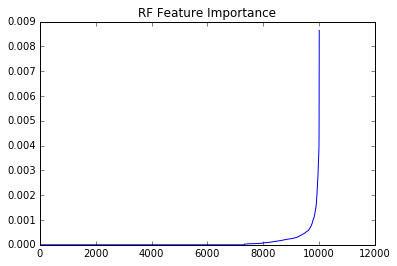

In [18]:
plt.plot(np.sort(RF.feature_importances_))
plt.title("RF Feature Importance")

In [19]:
## too good to be true
RF.score(np.log10(1e-9+ X), y)

1.0

In [39]:
len(RF.feature_importances_[RF.feature_importances_>2e-3])

86

In [40]:
%%time 
##
# lets see if these important features imprve logistic regression
##

clf_pipe = Pipeline([
    ('classify', LogisticRegression())
])

param_grid = [
    { 'classify__C':np.logspace(start = -3, stop = 3, num = 50)
    }
]



lr_grid = GridSearchCV(clf_pipe, cv=3, n_jobs=-2, param_grid=param_grid)
lr_grid.fit(np.log10(1e-9+ X[:, RF.feature_importances_>2e-3]), y)

CPU times: user 1.19 s, sys: 276 ms, total: 1.46 s
Wall time: 1.38 s


In [41]:
lr_grid.best_score_

0.98412698412698407

In [42]:
RF_KEGGs_df = pd.DataFrame({"RF KEGGS": df["kegg"][RF.feature_importances_>2e-3]})

In [43]:
RF_KEGGs_df.to_csv("../results/KEGGs-RF-multiclassificaiton_2018-03-11.csv", index = False)